In [5]:
#Librarys
import os
import matplotlib.pyplot as plt


In [ ]:
#Data

### EDA


In [7]:
from collections import Counter

image_dir1 = '../Data/(E.S)B-light (1)'
image_dir2 = '../Data/(E.S)D-indoor'
image_dir3 = '../Data/svt/svt1/img'  

# Obtener la lista de archivos en los tres directorios
image_files1 = os.listdir(image_dir1)
image_files2 = os.listdir(image_dir2)
image_files3 = os.listdir(image_dir3)

# Extraer las extensiones de archivo para los tres directorios
extensions1 = [os.path.splitext(file)[1].lower() for file in image_files1]
extensions2 = [os.path.splitext(file)[1].lower() for file in image_files2]
extensions3 = [os.path.splitext(file)[1].lower() for file in image_files3]

# Unir todas las listas de extensiones
all_extensions = extensions1 + extensions2 + extensions3

# Contar la frecuencia de cada tipo de formato
format_counts = Counter(all_extensions)

# Mostrar la distribución de formatos de imagen
print("Distribución de formatos de imagen:", format_counts)

Distribución de formatos de imagen: Counter({'.jpg': 433, '.bmp': 83, '.xml': 83, '.db': 2})


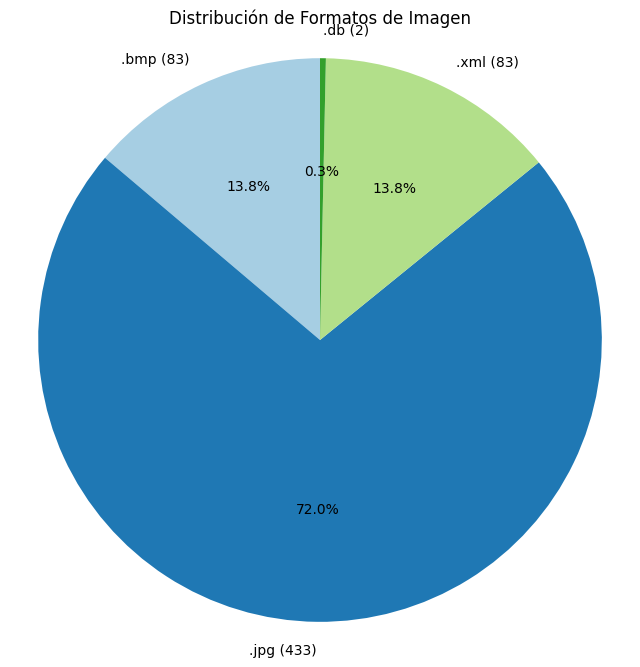

In [8]:
# Crear las etiquetas y los tamaños para el gráfico de pastel
labels = [f'{ext} ({count})' for ext, count in format_counts.items()]  # Etiquetas con nombre y cantidad
sizes = [count for count in format_counts.values()]  # Tamaños en base a la cantidad

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Asegurar que el gráfico sea circular
plt.axis('equal')
plt.title("Distribución de Formatos de Imagen")
plt.show()

In [11]:
from PIL import Image
import os
from collections import Counter

# Rutas a los directorios donde se encuentran las imágenes
image_dirs = [
    '../Data/(E.S)B-light (1)', 
    '../Data/(E.S)D-indoor',
    '../Data/svt/svt1/img'  # Agregar la nueva carpeta
]

# Lista para almacenar las resoluciones de las imágenes
resolutions = []

# Iterar sobre todas las imágenes en cada directorio
for image_dir in image_dirs:
    image_files = os.listdir(image_dir)
    
    for file in image_files:
        file_path = os.path.join(image_dir, file)
        try:
            with Image.open(file_path) as img:
                # Obtener la resolución (ancho, alto)
                resolution = img.size  # img.size devuelve una tupla (ancho, alto)
                resolutions.append(resolution)
        except Exception as e:
            print(f"Error al procesar {file}: {e}")

# Contar las resoluciones para ver si hay consistencia
resolution_counts = Counter(resolutions)

# Mostrar los resultados
print("Distribución de resoluciones:", resolution_counts)

Error al procesar 080116-0053.xml: cannot identify image file '../Data/(E.S)B-light (1)\\080116-0053.xml'
Error al procesar 080116-0059.xml: cannot identify image file '../Data/(E.S)B-light (1)\\080116-0059.xml'
Error al procesar 080119-0038.xml: cannot identify image file '../Data/(E.S)B-light (1)\\080119-0038.xml'
Error al procesar DSC02587.xml: cannot identify image file '../Data/(E.S)B-light (1)\\DSC02587.xml'
Error al procesar DSC02712.xml: cannot identify image file '../Data/(E.S)B-light (1)\\DSC02712.xml'
Error al procesar DSC02980.xml: cannot identify image file '../Data/(E.S)B-light (1)\\DSC02980.xml'
Error al procesar DSC03007.xml: cannot identify image file '../Data/(E.S)B-light (1)\\DSC03007.xml'
Error al procesar DSC04200.xml: cannot identify image file '../Data/(E.S)B-light (1)\\DSC04200.xml'
Error al procesar Thumbs.db: cannot identify image file '../Data/(E.S)B-light (1)\\Thumbs.db'
Error al procesar v.xml: cannot identify image file '../Data/(E.S)B-light (1)\\v.xml'
Er

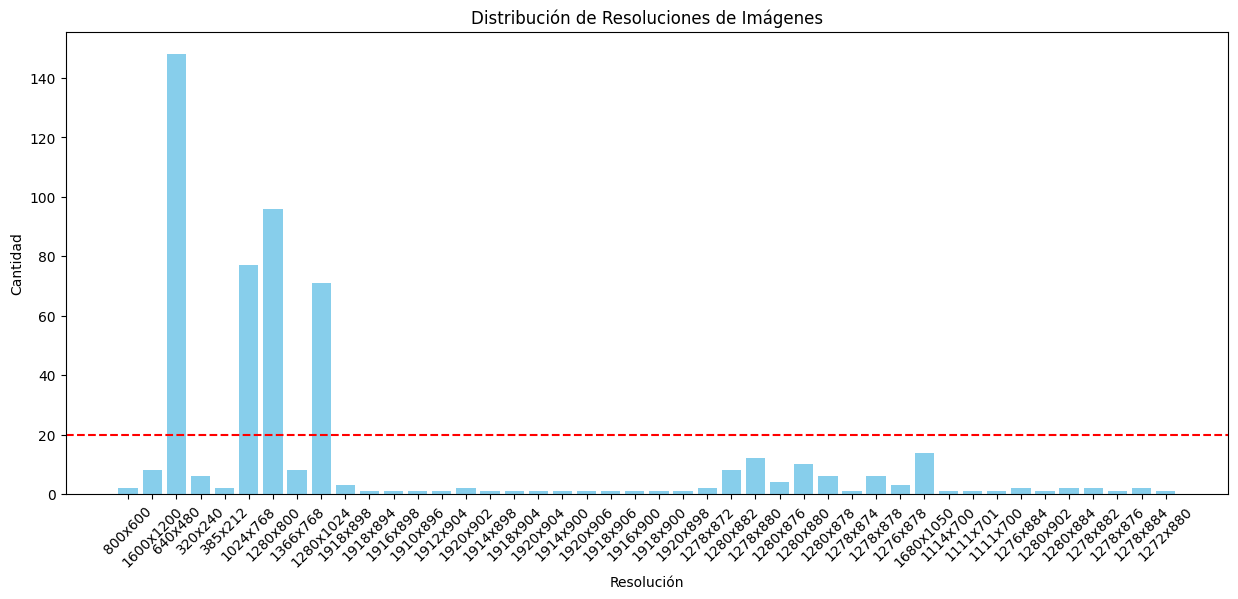

In [14]:
import matplotlib.pyplot as plt

# Crear listas separadas para resoluciones y sus conteos
resolutions = list(resolution_counts.keys())
counts = list(resolution_counts.values())

# Convertir resoluciones a formato de cadena para etiquetas
resolution_labels = [f"{w}x{h}" for (w, h) in resolutions]

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(resolution_labels, counts, color='skyblue')

# Añadir una línea punteada roja en el valor 20 en el eje y
plt.axhline(y=20, color='red', linestyle='--', linewidth=1.5)

# Añadir etiquetas y título
plt.xlabel('Resolución')
plt.ylabel('Cantidad')
plt.title('Distribución de Resoluciones de Imágenes')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario para mejor visibilidad

# Mostrar el gráfico
plt.show()